# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter=";")

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=";")

In [3]:
azdias.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [4]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [6]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,GEBAEUDETYP_RASTER,person,ordinal,[-1]
freq,1,43,49,26


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

Firstly, the number of missing values in the azdias dataset can be analyzed by using counting. In this way, we can have the total number of missing values in the dataset before the conversion and after the conversion.

In [7]:
# Identify missing or unknown data values and convert them to NaNs.
# First, identify the number of missing values in the dataset by counting nulls.

count_natural_missing = azdias.isnull().sum()
display(count_natural_missing)

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [8]:
# Print the total number of naturally missing data

print('Total number of naturally missing values is counted as {}'.format(count_natural_missing.sum()))

Total number of naturally missing values is counted as 4896838


As stated in the above cell, 4896838 values are missing in the dataset. Before converting missing values to NaN, we should perform the parsing which is the process of analyzing text mode of a sequence of tokens to determine its grammatical structure with respect to given formal grammer. The parser then builds a data structure based on tokens.[1]

[1] https://stackoverflow.com/questions/2933192/what-is-parsing-in-terms-that-a-new-programmer-would-understand

[2] https://docs.python.org/2.7/reference/compound_stmts.html#the-try-statement

[3] https://jasonlinotes.blogspot.com/2015/03/strip-vs-replace.html


In [9]:

#First attempt but it took too long to save .csv file.
#remove_char = ['\[', '\]']
#missing_or_unknown = feat_info['missing_or_unknown']   
#missing_or_unknown = missing_or_unknown.replace (to_replace = remove_char, value = '', regex = True)

#missing_or_unknown_list = []
#for item in range(len(missing_or_unknown)):
#    missing_or_unknown_list.append (missing_or_unknown [item].split (','))
    
#for item in range (len (missing_or_unknown_list)): 
#    azdias[coloumn_names] = azdias [coloumn_names].replace (to_replace = missing_or_unknown_list [item], value = np.NaN, regex = True, inplace = True)
#
#azdias.to_csv('azdias_parsed.csv', sep=';', index = False)
# Load in the general demographics data.
#azdias_parsed = pd.read_csv('azdias_parsed.csv', delimiter=';')


In [10]:
'''
Before proceding, parsing the data should be performed. Since we want to change particular labels according to
index of missing or unknown, loc will be used instead of iloc.
'''
# Total conversion time is important so add timer.

start = time.time()
for index in feat_info.index:
    feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].replace("[","")
    feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].replace("]","")
    feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].split(',')
    
    for indx in range(len(feat_info.loc[index, 'missing_or_unknown'])):
        # Check the item in location is integer or not. If integer do nothing.
        try:       
            feat_info.loc[index,'missing_or_unknown'][indx] = int(feat_info.loc[index,'missing_or_unknown'][indx])
         # If not, continue to perform NaN conversion
        except: 
            continue
    azdias.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)

stop = time.time()
print("Total conversion time of this procedure: {:.2f} seconds".format(stop-start))
print('Total number of missing values after conversion is {}'.format(azdias.isnull().sum().sum()))


Total conversion time of this procedure: 3.10 seconds
Total number of missing values after conversion is 8373929


Before the conversion to NaNs, we have 4896838 missing values, now we have 8373929 missing values after idetifying NaN values.

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?


[1] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
# Find the percentage of missing values in each column
percent_missing = azdias.isnull().sum() * 100 / len(azdias)
# Create a new dataframe for the missing value counts . Since azdias is already indexed, no need to show column names.
missing_values = pd.DataFrame({'Percentage of Missing Values': percent_missing})

missing_values.sort_values('Percentage of Missing Values',ascending=True, inplace=True)
missing_values

,Percentage of Missing Values
ZABEOTYP,0.000000
SEMIO_TRADV,0.000000
SEMIO_PFLICHT,0.000000
SEMIO_KAEM,0.000000
SEMIO_DOM,0.000000
SEMIO_KRIT,0.000000
SEMIO_RAT,0.000000
SEMIO_KULT,0.000000
SEMIO_ERL,0.000000
SEMIO_LUST,0.000000


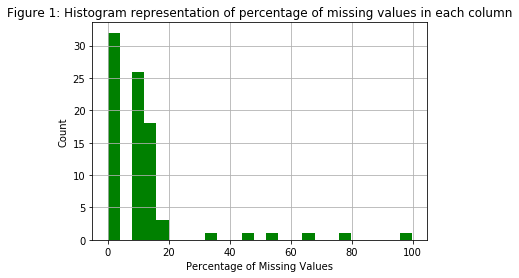

In [12]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(missing_values['Percentage of Missing Values'], bins=25, facecolor = 'g', alpha = 1)
plt.ylabel('Count')
plt.xlabel('Percentage of Missing Values')
plt.title('Figure 1: Histogram representation of percentage of missing values in each column')
plt.grid(True)
plt.show()


In the above Figure, it is seen that the huge amount of missing values are present before 20%. At the first glance, it can be said that to remove columns which have missing values more than 20%. 

In [13]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
# Find the percentage of missing values in each column
missing_values_dropped = missing_values[missing_values['Percentage of Missing Values']>20]
missing_values_dropped

,Percentage of Missing Values
ALTER_HH,34.813699
GEBURTSJAHR,44.020282
KBA05_BAUMAX,53.468668
KK_KUNDENTYP,65.596749
AGER_TYP,76.955435
TITEL_KZ,99.757636


Next step will be removing above columns from the "azdias" dataset. We can extract the columns names from "missing_values_dropped" dataset and remove them from "azdias" and "feat_info".

In [14]:
azdias = azdias.drop (missing_values_dropped.index, axis = 1)
azdias.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,2.0,2,5.0,1,5,1,5,4,3,4,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,1.0,1,3.0,3,3,4,1,3,2,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,3.0,1,3.0,4,4,2,4,2,2,6,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,3.0,2,4.0,2,4,2,3,5,4,1,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [15]:
# remove dropped columns from feature info
drop_columns = missing_values_dropped.index.values
feat_info = feat_info[~feat_info['attribute'].isin(drop_columns)]
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


#### Discussion 1.1.2: Assess Missing Data in Each Column

In Figure 1, it is seen that most of the data has missing values between 0-1% percentage of its counts. And 6 columns have missing values more than 20% and they are decided as outliers. The column names are ALTER, GEBURTJAHR, KBA05_BAUMAX, KK_KUNDENTYP, AGER_TYP, and TITEL_KZ. The reason of dropping these columns instead of replacing their missing values is that since their missing value percentage is high, they can introduce bias and mislead the investigation.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [16]:
# How much data is missing in each row of the dataset?
missing_row = azdias.isnull().sum(axis=1)
print(sum(azdias.isnull().any(axis=1)))

268012


In [17]:
missing_row.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

From above calculations, we have 268012 missing values in 891221 observations for azdias dataset row after dropping the columns which have more than 20% percent missing values. We can illustrate the missing values in rows with histogram.

Text(0.5,1,'Figure 1: Missing Row Counts Histogram')

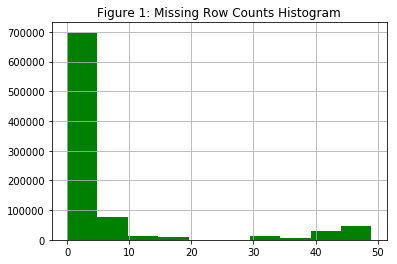

In [18]:
missing_row.hist(facecolor='g')
plt.title('Figure 1: Missing Row Counts Histogram')

From the histogram, it is seen that we can divide the data into two subsets from 20 point. In order to perform the splitting, we can add missing_row information to azdias dataset.

In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
missing_row = pd.DataFrame(missing_row, columns = ['missing_row'])
azdias_row = azdias.join(missing_row) 
azdias_missing_low = azdias_row[azdias_row['missing_row'] < 20]
azdias_missing_high = azdias_row[azdias_row['missing_row'] >=20];


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964bb566a0>]], dtype=object)

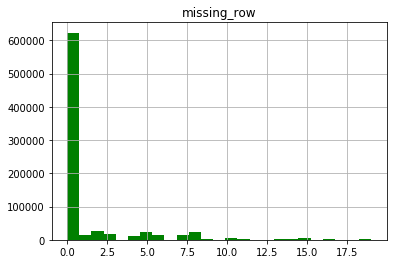

In [20]:
azdias_missing_low.hist (column = 'missing_row', bins = 25, facecolor = 'g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964b216c50>]], dtype=object)

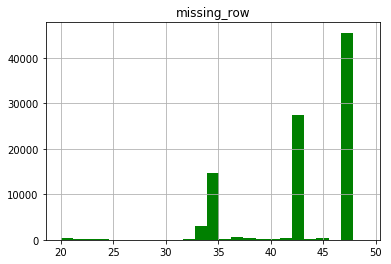

In [21]:
azdias_missing_high.hist (column = 'missing_row', bins = 25, facecolor = 'g')

In [22]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
# We have defined a df for missing value counts in columns as missing_values['Percentage of Missing Values']

zero_percentage_coloumns = missing_values[missing_values['Percentage of Missing Values'] == 0]
zero_percentage_coloumns = zero_percentage_coloumns[:]
zero_percentage_coloumns

,Percentage of Missing Values
ZABEOTYP,0.0
SEMIO_TRADV,0.0
SEMIO_PFLICHT,0.0
SEMIO_KAEM,0.0
SEMIO_DOM,0.0
SEMIO_KRIT,0.0
SEMIO_RAT,0.0
SEMIO_KULT,0.0
SEMIO_ERL,0.0
SEMIO_LUST,0.0


In [23]:
len(zero_percentage_coloumns)

24

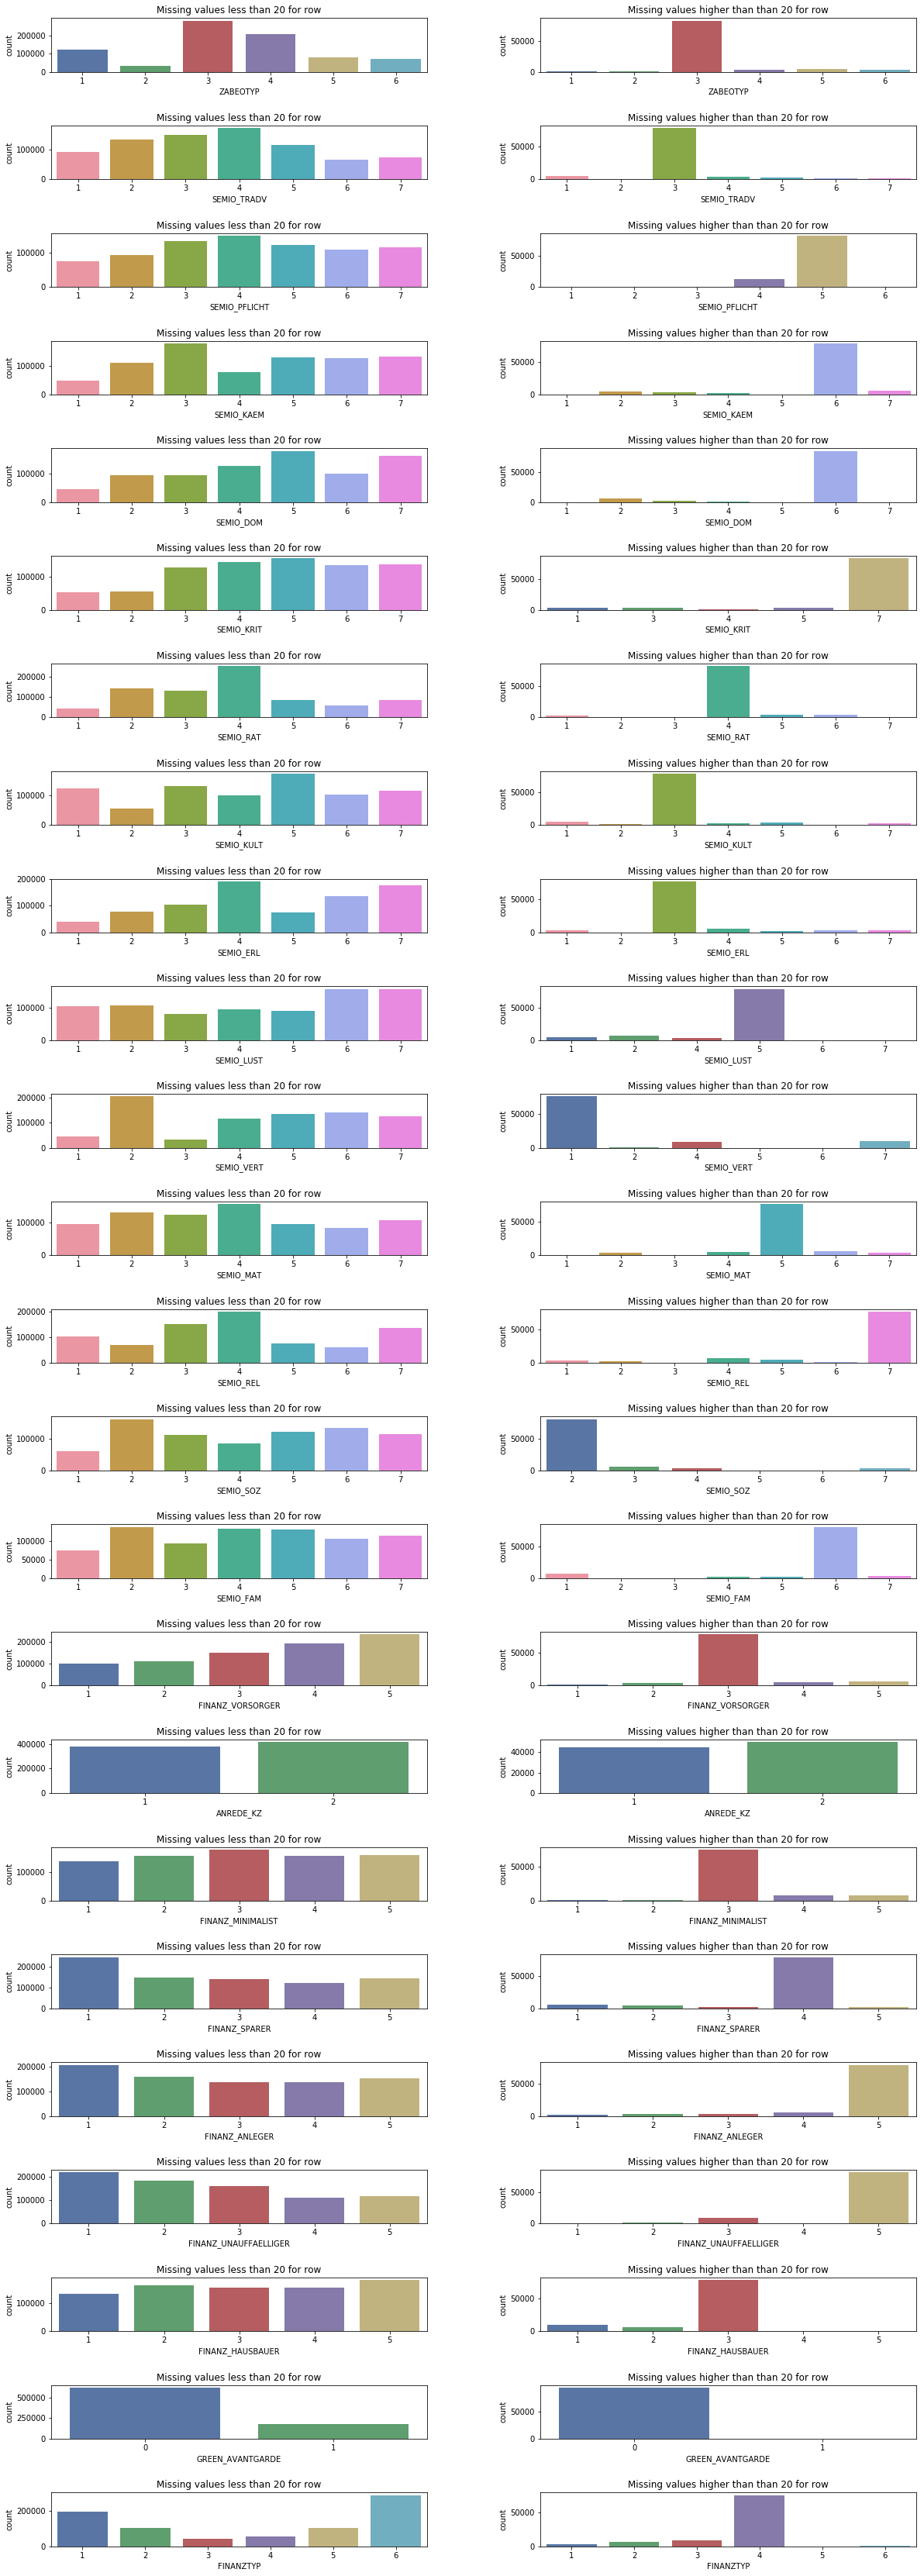

In [24]:
figure, axs = plt.subplots(nrows=len(zero_percentage_coloumns), ncols=2, figsize = (20,60))
figure.subplots_adjust(hspace = 1, wspace=.3)# the amount of width/height reserved for space between subplots,
sns.set(style="darkgrid")
for i in range(len(zero_percentage_coloumns)):
    sns.countplot(azdias_missing_low[zero_percentage_coloumns.index[i]], ax=axs[i][0])
    axs[i][0].set_title('Missing values less than 20 for row')
    sns.countplot(azdias_missing_high[zero_percentage_coloumns.index[i]], ax=axs[i][1])
    axs[i][1].set_title('Missing values higher than than 20 for row')

[1] https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

[2] https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

#### Discussion 1.1.3: Assess Missing Data in Each Row

First observation is that we have 268012 missing values in 891221 in azdias dataset rows. From the histogram, it is seen that we can divide the data into two subsets from 20 point. In order to perform the splitting, we can add missing_row information to azdias dataset. In this way, we are able to split the dataset according to the missing percentage values.
In the count plot section just above, I have chose to perform the plotting for each of the zero missing value columns since they are not too many, i.e 24 columns. If there is more columns, I will perform plotting option by selecting a column from every category to see the effect. (Category means the first indicator of label names like FINANZ_, ANREDE_, SEMIO_.

From the count plots, it can be said that even if for some features the distribution looks like same for the missing row sections, for most features like Finanz, the distribution is quite different. And it would be good to keep the rows which have missing values less than 20%.



In [25]:
# Before keeping low missing rows as a dataset, we need to remove missing_row columns from the azdias_missing_low.
azdias = azdias_missing_low.drop(['missing_row'],axis=1)
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [26]:
# remove dropped columns from feature info
drop_columns = azdias_missing_low.index.values
feat_info = feat_info[~feat_info['attribute'].isin(drop_columns)]
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [27]:
# How many features are there of each data type?
# with value_counts, the most frequent element will be displayed in first place.
feat_info['type'].value_counts()

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

[1] https://stackoverflow.com/questions/47487753/when-is-it-appropriate-to-use-df-value-counts-vs-df-groupby-count

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

First, display all of the categorical variables in the dataset.

In [28]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical_feat = feat_info[feat_info['type'] =='categorical']
display(categorical_feat)

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1, 0]"


Next step will be find out the binary and multi level features.

In [29]:
features = categorical_feat['attribute'].values

binary_feat = []
multi_feat = []

for feature in features:
    if azdias[feature].nunique()==2:
        binary_feat.append(feature)
    elif azdias[feature].nunique()>2:
        multi_feat.append(feature)

print('Binary features are: {}'.format(binary_feat))
print('Multi-level features are: {}'.format(multi_feat))

Binary features are: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level features are: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


Next step will be identify the unique parameters in binary and multi-level features.

In [30]:
# Re-encode categorical variable(s) to be kept in the analysis.
for feature in binary_feat:
    print('Unique values for {} are \n{}'.format(feature, azdias[feature].value_counts()))


Unique values for ANREDE_KZ are 
2    415578
1    381499
Name: ANREDE_KZ, dtype: int64
Unique values for GREEN_AVANTGARDE are 
0    621942
1    175135
Name: GREEN_AVANTGARDE, dtype: int64
Unique values for SOHO_KZ are 
0.0    790370
1.0      6707
Name: SOHO_KZ, dtype: int64
Unique values for VERS_TYP are 
2.0    394116
1.0    366623
Name: VERS_TYP, dtype: int64
Unique values for OST_WEST_KZ are 
W    628695
O    168382
Name: OST_WEST_KZ, dtype: int64


For binary features, next step will be making required changes.

In [31]:
# Conversion for binary features
azdias['ANREDE_KZ'].replace([2,1], [1,0], inplace=True)
azdias['SOHO_KZ'].replace([0.0,1.0], [0,1], inplace = True)
azdias['VERS_TYP'].replace([2.0,1.0], [1,0], inplace=True)
azdias['OST_WEST_KZ'].replace(['W','O'], [1,0], inplace=True)

For multi-level features, we have two options. One is dropping the multi-level features and other one is encoding the values by using multiple dummy variables, i.e, OneHotEncoder.

In [32]:
# Get dummies for multi-level features.
azdias = pd.get_dummies(azdias, columns=multi_feat)

#### Discussion 1.2.1: Re-Encode Categorical Features

As a first step, I have displpayed all of the categorical variables in the dataset. Then, I have identified the binary and multi-level categories. As recommended, I have kept the numerical variables as they are in the binary feat set but I have transformed string variables to 1s and 0s. For multi-level category, I have two options to choose dropping them or transform to dummy variables. Get_dummies is a common way to create dummy variables for categorical features and I have chose it. I didnt choose to drop the multi-level categories because transformation is simple. If I have has hundreds of multi level categorical variables, I would choose to drop them not to modify the dataframe that much.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

##### PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)




In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias['PRAEGENDE_JUGENDJAHRE'].value_counts()

14.0    182833
8.0     141504
10.0     85746
5.0      84649
3.0      53811
15.0     42500
11.0     35729
9.0      33560
6.0      25649
12.0     24436
1.0      20639
4.0      20450
2.0       7479
13.0      5759
7.0       4009
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

We can create new columns from PRAEGENDE_JUGENDJAHRE according to the description provided in the Data_Dictionary.md. I will define a function after creating a interval_dictionary for decade mapping and binary variable conversion mapping for movement.

In [34]:
'''
Decade
0 = 40s, 1 = 50s, 2 = 60s, 3 = 70s, 4 = 80s, and 5 = 90s. NaN for others.
Movement
0 = Mainstream and 1 = Avantgarde
'''

interval_dictionary = {0: [1, 2], 1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]}
movement_dictionary = {0: [1, 3, 5, 8, 10, 12, 14], 1: [2, 4, 6, 7, 9, 11, 13,15]}
def decade_mapping(item):
    try:
        for code, definition in interval_dictionary.items():
            if item in definition:
                return code
    except ValueError:
        return np.nan

def movement_mapping(item):
    try:
        for code, definition in movement_dictionary.items():
            if item in definition:
                return code
    except ValueError:
            return np.nan

    

In [35]:
# Create decade column
azdias['PRAEGENDE_DECADE'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(decade_mapping)

# Create movement column
azdias['PRAEGENDE_MOVEMENT'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(movement_mapping)

In [36]:
# Check the created columns
azdias['PRAEGENDE_DECADE'].value_counts()

5.0    225333
3.0    175064
4.0    151670
2.0    114307
1.0     74261
0.0     28118
Name: PRAEGENDE_DECADE, dtype: int64

In [37]:
azdias['PRAEGENDE_MOVEMENT'].value_counts()

0.0    593618
1.0    175135
Name: PRAEGENDE_MOVEMENT, dtype: int64

##### CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

-----

Wealth mapping will be done according to the first integer in CAMEO_INTL_2015 and lifestage mapping is based on the second integer

In [38]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

'''
Wealth 
1 = Wealthy Households
2 = Proper Households
3 = Comfortable Households
4 = Less Affluent Households
5 = Poorer Households

Life Stage
1 = Pre-family Couples & Singles
2 = Young Couples with Children
3 = Families with School Age Children
4 = Older Families & Mature Couples
5 = Elders in Retirement
'''

def wealth_mapping(item):
    if pd.isnull(item):
        return np.nan
    else:
        return int(str(item)[0])


def lifestage_mapping(item):
    if pd.isnull(item):
        return np.nan
    else:
        return int(str(item)[1])


In [39]:
# Create wealth column
azdias['CAMEO_WEALTH'] = azdias['CAMEO_INTL_2015'].apply(wealth_mapping)

# Create life stage column
azdias['CAMEO_LIFESTAGE'] = azdias['CAMEO_INTL_2015'].apply(lifestage_mapping)

In [40]:
azdias['CAMEO_WEALTH'].value_counts()

5.0    223496
2.0    190426
4.0    189876
1.0    119329
3.0     68083
Name: CAMEO_WEALTH, dtype: int64

In [41]:
azdias['CAMEO_LIFESTAGE'].value_counts()

1.0    244914
4.0    232595
3.0    119508
5.0    116957
2.0     77236
Name: CAMEO_LIFESTAGE, dtype: int64

After creating the required columns, we can drop the original columns.

In [42]:
azdias = azdias.drop(['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015'], axis=1)


In [43]:
# remove dropped columns from feature info
drop_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']
feat_info = feat_info[~feat_info['attribute'].isin(drop_columns)]
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


Let's check for other mixed type columns in dataset.

In [44]:
feat_info.query('type == "mixed"')

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
56,WOHNLAGE,building,mixed,[-1]
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


**LP_LEBENSPHASE_FEIN** provides information about life stage and fine scale and also **LP_LEBENSPHASE_GROB** provides the similar information in rough scale, i.e lifes stage, rough scale. Therefore these two features can be dropped without putting any effor to analyze them.

**WOHNLAGE** provides the neighborhood quality information (or rural flag). This variable is mostly ordinal from levels 1-5, depicting a  building’s neighborhood quality from very good to very poor. The issue is that levels 7 and 8 (there’s no 6) are a ﬂag for if the building is in a rural neighborhood, disconnected from neighborhood quality. And if we want to use this information we need to encode it according to the provided information. However, I dont want to use this information.

And the last one is **PLZ8_BAUMAX** which is the most common building type within the PLZ8 region. This information can also be discarded in the analysis. 

So, I will remove the mixed type features.

In [45]:
mixed_features = feat_info.query('type == "mixed"')["attribute"]
mixed_features

15    LP_LEBENSPHASE_FEIN
16    LP_LEBENSPHASE_GROB
56               WOHNLAGE
79            PLZ8_BAUMAX
Name: attribute, dtype: object

In [46]:
for feature in mixed_features:
    azdias.drop(feature, axis=1, inplace=True)

In [47]:
# Remove them from the feat_info
#drop_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']
feat_info = feat_info[~feat_info['attribute'].isin(mixed_features)]
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


#### Discussion 1.2.2: Engineer Mixed-Type Features

In this section, firstly I have identified the PRAEGENDE_JUDENDJAHRE and CAMEO_INTL_2015 characteristics according to provided information. 

For PRAEGENDE_JUGENDJAHRE, I have defined two functions, one for decade mapping, one for movement mapping as requested. I have also applied NaN conversion, if the item is not in the specified arrays for both decade and movement mapping.

For CAMEO_INTL_2015, I have defined two functions, wealth mapping and lifestage mapping. Both mappings are based on the integer location. First integer corresponds to wealth and second one corresponds to lifestage. If the item in CAMEO_INTL_2015 is null, then NaN conversion takes place. 

After making mapping for both columns, I have kept the newly created columns with the functions and drop the original ones since they will not have any effect on the analysis.

In addition to encoded mixed type features, I have decided to remove others because of the reasoning I have made in the analysis.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [48]:
# Check the first property, which is the type of the columns.
np.unique(azdias.dtypes.values)

array([dtype('uint8'), dtype('int64'), dtype('float64')], dtype=object)

In [49]:
# Check for the missing value count on each column
missing_count = pd.DataFrame(data = azdias.isna().sum(), columns = ['Count'])
missing_count.head()

,Count
ALTERSKATEGORIE_GROB,2773
ANREDE_KZ,0
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0


(array([ 172.,    1.,    0.,    6.,    2.,    2.,    6.,    0.,    0.,    3.]),
 array([     0. ,   6415.5,  12831. ,  19246.5,  25662. ,  32077.5,
         38493. ,  44908.5,  51324. ,  57739.5,  64155. ]),
 <a list of 10 Patch objects>)

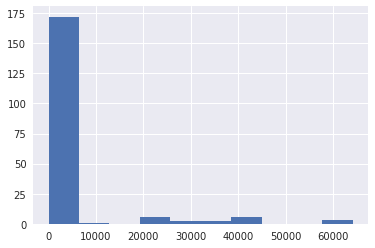

In [50]:
# Check for the histogram distribution of missing values
plt.hist(missing_count['Count'])

(array([ 6.,  2.,  0.,  2.,  6.,  0.,  0.,  0.,  1.,  2.]),
 array([ 22382. ,  26559.3,  30736.6,  34913.9,  39091.2,  43268.5,
         47445.8,  51623.1,  55800.4,  59977.7,  64155. ]),
 <a list of 10 Patch objects>)

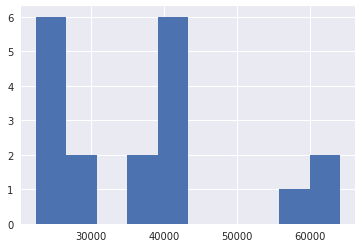

In [51]:
# Remove the outlier columns from the dataset. (after re-encoding categorical features)
# From the histogram above, we better delete columnns with NAs more than 200000
missing_count = missing_count[missing_count['Count']>20000]
missing_count.head()
plt.hist(missing_count['Count'])

It would be good to drop columns which have missing values more than 20000.

In [52]:
# Creating the new azdias by dropping the columns with more than 20000 missing values
azdias = azdias.drop(missing_count.index, axis=1)

(array([ 162.,    0.,    1.,    6.,    2.,    1.,    0.,    0.,    0.,    1.]),
 array([     0. ,   1206.6,   2413.2,   3619.8,   4826.4,   6033. ,
          7239.6,   8446.2,   9652.8,  10859.4,  12066. ]),
 <a list of 10 Patch objects>)

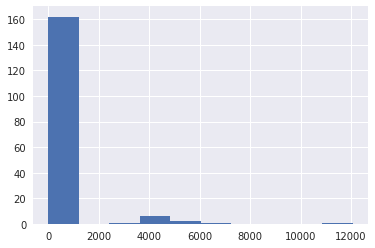

In [53]:
na_count = azdias.isna().sum()
plt.hist(na_count)

In [54]:
drop_columns = missing_count.index.values
feat_info = feat_info[~feat_info['attribute'].isin(missing_count)]
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [55]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')
    
    for index in feat_info.index:
        feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].replace("[","")
        feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].replace("]","")
        feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].split(',')
    
    for indx in range(len(feat_info.loc[index, 'missing_or_unknown'])):
        # Check the item in location is integer or not. If integer do nothing.
        try:       
            feat_info.loc[index,'missing_or_unknown'][indx] = int(feat_info.loc[index,'missing_or_unknown'][indx])
         # If not, continue to perform NaN conversion
        except: 
            continue
    df.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)

    # remove selected columns and rows, ...
    # Identify the removed columns
    # Find the percentage of missing values in columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    # Create a new dataframe for the missing value counts . Since azdias is already indexed, no need to show column names.
    missing_values = pd.DataFrame({'Percentage of Missing Values': percent_missing})
    missing_values_dropped = missing_values[missing_values['Percentage of Missing Values']>20]
    df = df.drop (missing_values_dropped.index, axis = 1)    
    # remove dropped columns from feature info
    drop_columns = missing_values_dropped.index.values
    feat_info = feat_info[~feat_info['attribute'].isin(drop_columns)]
    
    # Identify the removed rows
    missing_row = df.isnull().sum(axis=1)
    missing_row = pd.DataFrame(missing_row, columns = ['missing_row'])
    df_row = df.join(missing_row) 
    df_missing_low = df_row[df_row['missing_row'] < 20]
    df_missing_high = df_row[df_row['missing_row'] >=20];
    df = df_missing_low.drop(['missing_row'],axis=1)
    
    # remove dropped columns from feature info after removed rows
    drop_columns_2 = df_missing_low.index.values
    feat_info = feat_info[~feat_info['attribute'].isin(drop_columns_2)]
    

    
    # select, re-encode, and engineer column values.
    
    # Find the categorical types
    categorical_feat = feat_info[feat_info['type'] =='categorical']
    features = categorical_feat['attribute'].values

    binary_feat = []
    multi_feat = []

    for feature in features:
        if df[feature].nunique()==2:
            binary_feat.append(feature)
        elif df[feature].nunique()>2:
            multi_feat.append(feature)
    
    # Conversion for binary features
    # Check for column names first.
    col_1 = 'ANREDE_KZ'
    col_2 = 'SOHO_KZ'
    col_3 = 'VERS_TYP'
    col_4 = 'OST_WEST_KZ'
    if col_1 in df.columns:
        df[col_1].replace([2,1], [1,0], inplace=True)
    if col_2 in df.columns:
        df[col_2].replace([0.0,1.0], [0,1], inplace = True)
    if col_3 in df.columns:
        df[col_3].replace([2.0,1.0], [1,0], inplace=True)
    if col_4 in df.columns:
        df['col_4'].replace(['W','O'], [1,0], inplace=True)
    # Get dummies for multi-level features.
    df = pd.get_dummies(df, columns=multi_feat)
    
    interval_dictionary = {0: [1, 2], 1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]}
    movement_dictionary = {0: [1, 3, 5, 8, 10, 12, 14], 1: [2, 4, 6, 7, 9, 11, 13,15]}
    
    # Create decade column
    col_5 = 'PRAEGENDE_JUGENDJAHRE' 
    col_6 = 'CAMEO_INTL_2015'
    if col_5 in df.columns:
        df['PRAEGENDE_DECADE'] = df[col_5].apply(decade_mapping)
        # Create movement column
        df['PRAEGENDE_MOVEMENT'] = df[col_5].apply(movement_mapping)
        df = df.drop(['PRAEGENDE_JUGENDJAHRE'], axis=1)
        feat_info = feat_info[~feat_info['attribute'].isin(['PRAEGENDE_JUGENDJAHRE'])]
    if col_6 in df.columns:
        df['CAMEO_WEALTH'] = df[col_6].apply(wealth_mapping)
        # Create life stage column
        df['CAMEO_LIFESTAGE'] = df[col_6].apply(lifestage_mapping)
        df = df.drop([col_6], axis=1)
        feat_info = feat_info[~feat_info['attribute'].isin(['CAMEO_INTL_2015'])]
   
    # Drop mixed type features
    mixed_features = feat_info.query('type == "mixed"')["attribute"]
    for feature in mixed_features:
        df.drop(feature, axis=1, inplace=True)
    
    feat_info = feat_info[~feat_info['attribute'].isin(mixed_features)]
    
    # Check for missing value count
    missing_count = pd.DataFrame(data = df.isna().sum(), columns = ['Count'])
    missing_count = missing_count[missing_count['Count']>20000]
    df = df.drop(missing_count.index, axis=1)
    
    drop_column_3 = missing_count.index.values
    feat_info = feat_info[~feat_info['attribute'].isin(drop_column_3)]

    # Return the cleaned dataframe.
    return df
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [56]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import Imputer

azdias_copy = azdias.copy()

# Impute NaNs
imputer = Imputer(strategy = 'median')
azdias_imputer = imputer.fit_transform(azdias_copy)

In [57]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
azdias_standardized = scaler.fit_transform(azdias_imputer)

In [58]:
azdias_standardized = pd.DataFrame(azdias_standardized)
azdias_standardized.columns = azdias.columns
azdias_standardized.index = azdias.index
azdias_standardized.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,RETOURTYP_BK_S,...,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,CAMEO_WEALTH,CAMEO_LIFESTAGE
1,-1.766173,0.958121,-1.494463,1.538139,-1.040664,1.466401,0.959974,1.338532,-0.530654,-1.685769,...,-0.209209,-0.201087,-0.150111,-0.162625,-0.189607,-0.179893,-0.192884,-0.089706,1.185870,-1.266579
2,0.200733,0.958121,-1.494463,0.864753,-1.766903,-0.570914,0.245238,1.338532,1.884467,-0.307336,...,-0.209209,-0.201087,-0.150111,-0.162625,-0.189607,-0.179893,-0.192884,-0.089706,-0.868228,0.761196
3,1.184186,0.958121,0.683285,-0.482020,1.138052,-0.570914,-1.184235,-0.792444,-0.530654,-0.996552,...,-0.209209,-0.201087,-0.150111,-0.162625,-0.189607,-0.179893,-0.192884,-0.089706,-1.552928,-0.590654
4,0.200733,-1.043709,0.683285,0.191366,0.411813,-1.250019,0.245238,-0.792444,-0.530654,1.071097,...,-0.209209,-0.201087,-0.150111,-0.162625,-0.189607,-0.179893,-0.192884,-0.089706,0.501170,0.085271
5,-1.766173,0.958121,-0.042631,-1.155407,1.138052,-0.570914,-0.469499,1.338532,-0.530654,-0.307336,...,-0.209209,4.972969,-0.150111,-0.162625,-0.189607,-0.179893,-0.192884,-0.089706,1.185870,0.761196


### Discussion 2.1: Apply Feature Scaling


Imputation is used for completing missing values. One point that the sklearn imputer works on numbers, not strings. So, for numbers:
* "Mean" strategy is used for numeric columns.
* "Median" strategy is used for integer columns.
* "Most_Frequent" strategy is used for non-numeric columns.

Besides the fact that mean will result in floating numbers in the dataset, "median" is more robust than the outliers than "mean". Becuase of these, I have chosen the median strategy.

I have used the StandardScale to normalize the values as recommended.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [59]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(azdias_standardized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA can be summarized as capturing the data in a few "principal" components, which have the most variation in the dataset. Working principle of PCA is reducing the overwhelming number of dimensions by constructing principal components from them, PCA does not discard or remove any samples or any variables or any characteristic features. The constructed principal components, PCs, are used to describe the variation and influences of the original characteristics. And these influences can be identified by using the PCA plotting techniques.

A **score plot** is a basic scatter plot of PCA to identfiy the clusters of samples based on their similarity.

A **loading** plot shows how strongly each characteristic influences a principal component. In the loading plot analysis, the angles between the vectors are related to their correlation characteristics. Such as;
* When two vectors are close, forming a small angle, the two variables they represent are positively correlated. 
* If they meet each other at 90°, they are not likely to be correlated.
* When they diverge and form a large angle (close to 180°), they are negative correlated.

A **PCA biplot** is constructed with PCA score plot and a loading plot. The left and bottom axes are of the PCA plot is corresponding the reading of PCA scores of the samples, dots. The top and right axes belong to the loading plot for reading how strongly each characteristic, vector, influence the principal components.

A **Scree Plot** is a simple line segment plot that shows the fraction of total variance in the data as explained or represented by each PC. The PCs are ordered, and by definition are therefore assigned a number label, by decreasing order of contribution to total variance. The PC with the largest fraction contribution is labeled with the label name from the preferences file. [1]
A scree plot shows how much variation each PC captures from the data. The y axis is eigenvalues, which essentially stand for the amount of variation. [2]

[1] http://www.improvedoutcomes.com/docs/WebSiteDocs/PCA/Creating_a_Scree_Plot.htm

[2] https://medium.com/@bioturing/how-to-read-pca-biplots-and-scree-plots-186246aae063

[3] Udacity Course Lectures


In [60]:
# Investigate the variance accounted for by each principal component.
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    Scree plot function code is implemented by using Udacity Course Lectures content.
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


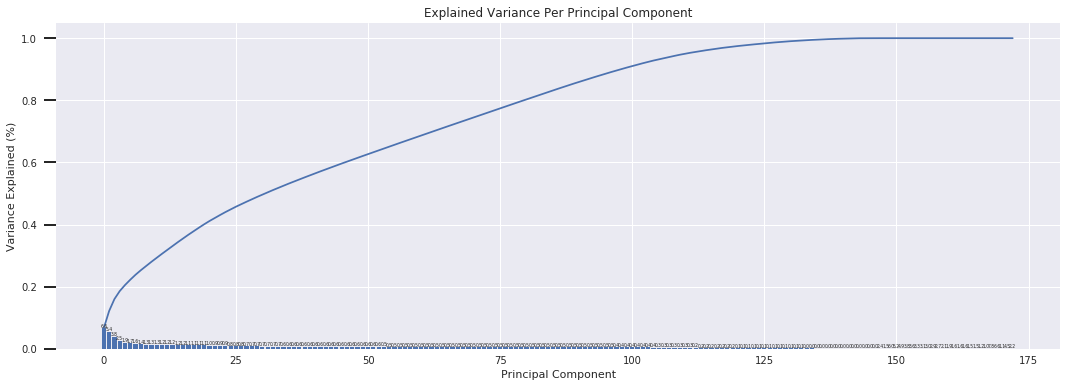

In [61]:
scree_plot(pca)

In [62]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components = 100)
azdias_standardized_pca = pca.fit_transform(azdias_standardized)

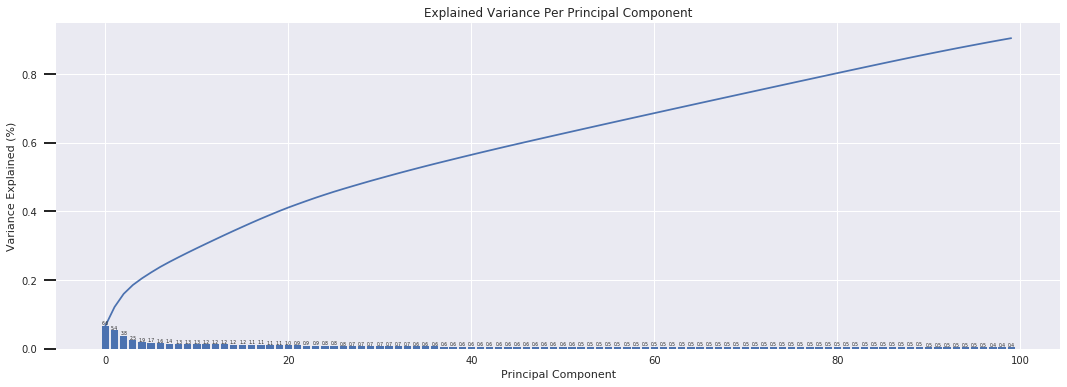

In [63]:
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

I choose 100 components for the next step for the analysis.When n_components equals 100, the variance explained is close to 90%.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [64]:
def pca_weights(data, pca, dimension):   
    # PCA components
    components = pd.DataFrame(pca.components_, columns=list(data.columns))
    # Sort the principal components weight
    weights = components.iloc[dimension-1].sort_values(ascending=False)    
    return weights

With the **pca_weights** function, we can print out the sorted weights of the features with respect to principal components. As a requested, we can check the first three principal components.

In [65]:
PC_1 = pca_weights(azdias_standardized, pca, dimension = 1)
print (PC_1)

FINANZ_SPARER            0.227367
SEMIO_PFLICHT            0.189156
SEMIO_REL                0.186619
FINANZTYP_1              0.183909
LP_STATUS_GROB_1.0       0.182951
SEMIO_TRADV              0.166106
HH_EINKOMMEN_SCORE       0.165375
LP_STATUS_FEIN_2.0       0.165299
FINANZ_UNAUFFAELLIGER    0.159715
SEMIO_RAT                0.159046
FINANZ_ANLEGER           0.158651
CAMEO_WEALTH             0.152756
ZABEOTYP_5               0.123050
SEMIO_KULT               0.122137
SEMIO_MAT                0.119298
ORTSGR_KLS9              0.118782
EWDICHTE                 0.116349
SEMIO_FAM                0.113252
FINANZ_HAUSBAUER         0.110702
CAMEO_DEUG_2015_9        0.102001
ZABEOTYP_4               0.089262
ANZ_HAUSHALTE_AKTIV      0.089061
ARBEIT                   0.088065
RELAT_AB                 0.082939
GFK_URLAUBERTYP_12.0     0.080630
LP_STATUS_FEIN_1.0       0.073796
CAMEO_DEUG_2015_8        0.070901
LP_FAMILIE_FEIN_1.0      0.069528
LP_FAMILIE_GROB_1.0      0.069528
NATIONALITAET_

In [66]:
PC_2 = pca_weights(azdias_standardized, pca, dimension = 2)
print(PC_2)

ZABEOTYP_3               0.184405
FINANZ_HAUSBAUER         0.181567
CAMEO_WEALTH             0.169449
LP_STATUS_FEIN_1.0       0.164255
SEMIO_ERL                0.163933
HH_EINKOMMEN_SCORE       0.161372
ALTERSKATEGORIE_GROB     0.160318
ORTSGR_KLS9              0.148946
EWDICHTE                 0.148290
LP_STATUS_GROB_1.0       0.144735
FINANZ_VORSORGER         0.140883
RETOURTYP_BK_S           0.129129
LP_FAMILIE_FEIN_1.0      0.122304
LP_FAMILIE_GROB_1.0      0.122304
SEMIO_KAEM               0.118822
SEMIO_LUST               0.117624
ARBEIT                   0.117010
SEMIO_KRIT               0.113230
ANZ_HAUSHALTE_AKTIV      0.112851
RELAT_AB                 0.109675
CAMEO_DEUG_2015_8        0.091306
ANREDE_KZ                0.090753
CAMEO_DEUG_2015_9        0.087612
SEMIO_DOM                0.081265
FINANZTYP_5              0.079038
CJT_GESAMTTYP_2.0        0.075769
GEBAEUDETYP_3.0          0.063859
GFK_URLAUBERTYP_4.0      0.060573
CAMEO_DEU_2015_8A        0.054821
CJT_GESAMTTYP_

In [67]:
PC_3 = pca_weights(azdias_standardized, pca, dimension = 3)
print(PC_3)

SEMIO_VERT               0.313645
SEMIO_SOZ                0.253250
SEMIO_FAM                0.252566
SEMIO_KULT               0.239868
FINANZTYP_5              0.145524
SHOPPER_TYP_0.0          0.115923
FINANZ_MINIMALIST        0.112654
RETOURTYP_BK_S           0.099658
SEMIO_REL                0.094290
ZABEOTYP_1               0.083391
LP_STATUS_FEIN_1.0       0.083281
ORTSGR_KLS9              0.081268
EWDICHTE                 0.080173
SEMIO_MAT                0.076621
FINANZ_VORSORGER         0.068209
CAMEO_WEALTH             0.063561
ZABEOTYP_6               0.063315
ARBEIT                   0.056986
RELAT_AB                 0.054295
SHOPPER_TYP_1.0          0.052773
LP_STATUS_FEIN_3.0       0.048841
CAMEO_DEUG_2015_9        0.046635
ANZ_HAUSHALTE_AKTIV      0.045845
GEBAEUDETYP_3.0          0.043213
LP_FAMILIE_FEIN_1.0      0.041738
LP_FAMILIE_GROB_1.0      0.041738
ALTERSKATEGORIE_GROB     0.041669
GFK_URLAUBERTYP_4.0      0.039724
SEMIO_LUST               0.038895
CAMEO_DEU_2015

We have listed the weights of first three principal components. In order to observe the features weight in a visual way, we can plot the first 5 and last 5 weights.

In [68]:
def plot_pca(data, pca, dimension):
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()).iloc[dimension-1]
    components.sort_values(ascending=False, inplace=True)
    components = pd.concat([components.head(5), components.tail(5)])
    
    components.plot(kind = 'bar', title = 'Principal Component ' + str(dimension))
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)
    ax.set_axisbelow(True)
    plt.show()

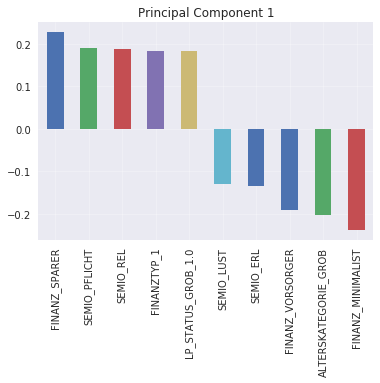

In [69]:
plot_pca(azdias_standardized, pca, dimension = 1)

It is seen that the **Principal Component 1** has a positive correlation with;
* FINANZ_SPARER: Personal level features, Financial typology, Money-saver
* SEMIO_PFLICHT: Personality typology, dutiful
* LP_STATUS_GROB_1: Personal level features, Social status, low-income earners.
* SEMIO_REL: Personal level features, Personality typology, religous
* FINANZTYP_1: Personal level features, Most descriptive financial type for individual and 1 for low financial interest

has a negative correlation with;
* SEMIO_LUST: Personal level features, typology, Sensual-minded
* SEMI_ERL: Personal level features, typology, Event-Oriented
* FINANZ_VORSORGER: Personal level features, Financial typology, Be prepared
* ALTERSKATEGORIE_GROB: Personal level features, Estimated age based on given name analysis
* FINANZ_MINIMALIST: Personal level features, Financial typology, Low financial interest


So, it seems PC-1 is corresponding to personal level features such as financial status and personalities. For financial point of view, it can be said that PC-1 is linked to financial savings. And also, it can be linked to age distribution by estimating the age from given name.

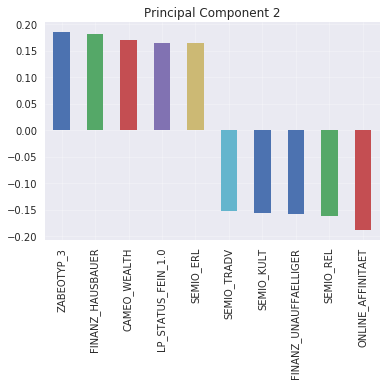

In [70]:
plot_pca(azdias_standardized, pca, dimension = 2)

It is seen that the **Principal Component 2** has a positive correlation with;
* ZABEOTYP_3:Personal level features, Energy consumption typology, fair supplied
* FINANZ_HAUSBAUER: Personal level features, Financial typology, home ownership
* CAMEO_WEALTH: Created from CAMEO_INTL_2015, wealth stage typology  
* SEMIO_ERL: Personal level features, Personality, Event-oriented
* LP_STATUS_FEIN_1: Personal level features, Social Status, Low income earners

And negative correlation with
* SEMIO_TRADV:Personal level features, Personality, Traditional-minded
* SEMIO_KULT:Personal level features, Personality, culturel-minded
* FINANZ_UNAUFFAELLIGER: Personal level features, Financial typology, inconspicius
* SEMIO_REL:Personal level features, Personality, religious
* ONLINE_AFFINITAET: Online affinity


PC-2 is related to personal choice and life style such as traditional and cultural minded have negative effect on PC-2. Social status and wealth status have positive effect on PC-2.

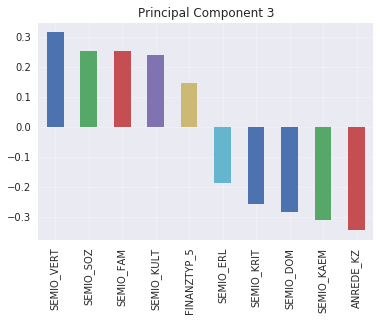

In [71]:
plot_pca(azdias_standardized, pca, dimension = 3)

It is seen that the **Principal Component 3** has a positive correlation with;
* SEMIO_VERT: Personal level features, Personality, Dreamful
* SEMIO_SOZ: Personal level features, Personality, Socially-minded
* SEMIO_FAM: Personal level features, Personality, Family-minded
* SEMIO_KULT: Personal level features, Personality, Cultural-minded
* FINANZTYP_5: Personal level features, Most descriptive financial type for individual, Investor

And negative correlation with;
* SEMIO_ERL: Personal level features, Personality, Event-oriented
* SEMIO_KRIT: Personal level features, Personality, Critical-minded
* SEMIO_DOM: Personal level features, Personality, Dominant-minded
* SEMIO_KAEM: Personal level features, Personality, Combative attitude
* ANREDE_KZ: Personal level features, Gender, (1-male, 2-female)

It is seen that PC-3 is mostly linked to personality traits and gender type. It can distinguish between the family-minded and critical minded females and males. 

### Discussion 2.3: Interpret Principal Components

Note: I have made my comments just below the PC plots.



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In the k-means clustering, a target number k which refers to the number of centroids in the dataset is defined. **The k-means algorithm** aim is to identfiy k  number of centroids and allocated every data point to the nearest cluster, while keeping the centroids as small as possible. It means that it will associate each point to one and only one cluster.

[1] https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [72]:
from sklearn.cluster import KMeans

In [73]:
def KMeansScore(data, center):
    # Apply clustering algorithm,
    kmeans = KMeans(n_clusters = center)
    # Fit the model
    model = kmeans.fit(data)
    # Get the score
    score = np.abs(model.score(data))
    # Return the score
    return score

In [74]:
scores = []
k_range = list(range(1,20))
for k in k_range:
    scores.append(KMeansScore(azdias_standardized_pca, k))  

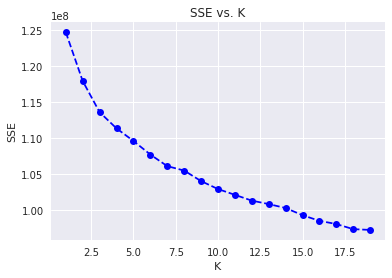

In [75]:
plt.plot(k_range, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [70]:
scores = []
k_range = list(range(1,30))
for k in k_range:
    scores.append(KMeansScore(azdias_standardized_pca, k))  

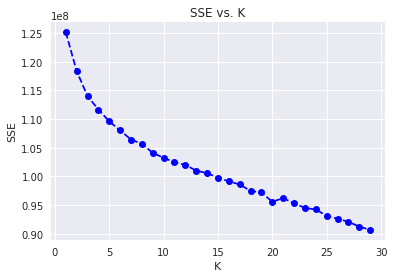

In [71]:
plt.plot(k_range, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [76]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 15)
Model_Kmeans = kmeans.fit(azdias_standardized)
azdias_prediction = Model_Kmeans.predict(azdias_standardized)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

For the selection of cluster, 15 seems reasonable to me because the average distance is smaller than the previous clusters.


### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [77]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

In [78]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 0 to 191651
Columns: 108 entries, ALTERSKATEGORIE_GROB to ZABEOTYP_6
dtypes: float64(3), int64(25), uint8(80)
memory usage: 57.0 MB


In [79]:
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,GREEN_AVANTGARDE,...,SHOPPER_TYP_3,VERS_TYP_-1,VERS_TYP_0,VERS_TYP_1,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
0,4,0,5,1,5,1,2,2,0,1,...,1,0,1,0,0,0,1,0,0,0
1,4,0,5,1,5,1,3,2,0,0,...,1,0,1,0,0,0,1,0,0,0
2,4,1,5,1,5,1,4,4,0,1,...,0,0,0,1,0,0,1,0,0,0
3,4,0,5,1,5,2,1,2,0,0,...,0,0,1,0,1,0,0,0,0,0
4,3,0,3,1,4,4,5,2,1960,0,...,0,0,0,1,1,0,0,0,0,0


(array([ 105.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([    0. ,   321.3,   642.6,   963.9,  1285.2,  1606.5,  1927.8,
         2249.1,  2570.4,  2891.7,  3213. ]),
 <a list of 10 Patch objects>)

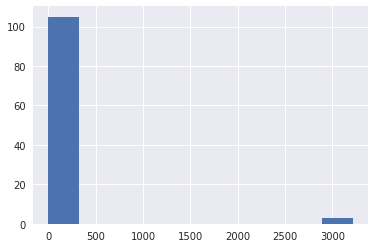

In [80]:
# Check for missing values after cleaning.
na_count = customers_clean.isna().sum()
plt.hist(na_count)

After cleaning the data, feature scaling and dimensionality reduction will be performed.

In [81]:
#imputer = Imputer()
customers_clean = pd.DataFrame(imputer.fit_transform(customers_clean), columns = customers_clean.columns)


In [82]:
# Standardize or Normalize
customers_clean = pd.DataFrame(scaler.fit_transform(customers_clean), columns = customers_clean.columns)

In [84]:
# Apply the fitted pca and kmeans on the customer data
customers_clean_pca = pca.transform(customers_clean)


ValueError: operands could not be broadcast together with shapes (191652,108) (173,) 

In [ ]:
cluster_customer_clean = kmeans.predict(customers_clean_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.